# Smart Irrigation


---
**Using an Artificial Neural Network along with an IoT device to check whether irrigation is required by the crops or not.**



**Reading the data from the CSV file keeping the required data and dropping unnamed files.**


---



*Information about the data*
*  There are 20 sensors.
*  There are 3 types of crops.


---



*Assumptions*
*  We have FC-28 sensors, which are scattered all round our crop field(FC-28 is a type of soil moisture sensor).
*  We have a nodeMCU.

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

In [3]:
df = pd.read_csv('Data.csv', delimiter=';')
print(df.head())

X = df.drop(['crop0', 'crop1', 'crop2'], axis=1)
y = df[['crop0', 'crop1', 'crop2']]
print(df.head())

   sensor0  sensor1  sensor2  sensor3  sensor4  sensor5  sensor6  sensor7  \
0      1.0      2.0      1.0      7.0      0.0      1.0      1.0      4.0   
1      5.0      1.0      3.0      5.0      2.0      2.0      1.0      2.0   
2      3.0      1.0      4.0      3.0      4.0      0.0      1.0      6.0   
3      2.0      2.0      4.0      3.0      5.0      0.0      3.0      2.0   
4      4.0      3.0      3.0      2.0      5.0      1.0      3.0      1.0   

   sensor8  sensor9  ...  sensor13  sensor14  sensor15  sensor16  sensor17  \
0      0.0      3.0  ...       8.0       1.0       0.0       2.0       1.0   
1      3.0      1.0  ...       4.0       5.0       5.0       2.0       2.0   
2      0.0      2.0  ...       3.0       3.0       1.0       0.0       3.0   
3      2.0      5.0  ...       4.0       1.0       1.0       4.0       1.0   
4      1.0      2.0  ...       1.0       3.0       2.0       2.0       1.0   

   sensor18  sensor19  crop0  crop1  crop2  
0       9.0       2.0  

In [4]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32, test_size=0.3)
n_predictors = X.shape[1]
n_targets = y.shape[1]

print(n_predictors)
print(n_targets)

20
3


In [5]:
# Creating our first ANN layer
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(n_predictors,)))
model.add(Dense(32, activation='relu', input_shape=(n_predictors,)))
model.add(Dense(n_targets, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 3,523
Trainable params: 3,523
Non-trainable params: 0
_________________________________________________________________


In [6]:
def get_model(n_pred, n_targ):
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(n_pred,)))
    model.add(Dense(128, activation='relu', input_shape=(n_pred,)))
    model.add(Dense(64, activation='relu', input_shape=(n_pred,)))
    model.add(Dense(64, activation='relu', input_shape=(n_pred,)))
    model.add(Dense(32, activation='relu', input_shape=(n_pred,)))
    model.add(Dense(32, activation='relu', input_shape=(n_pred,)))
    model.add(Dense(n_targ, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [7]:
# Fitting the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
44/44 [==============================] - 2s 13ms/step - loss: 0.6225 - accuracy: 0.4871 - val_loss: 0.4622 - val_accuracy: 0.5217
Epoch 2/100
44/44 [==============================] - 0s 5ms/step - loss: 0.4177 - accuracy: 0.5743 - val_loss: 0.3660 - val_accuracy: 0.5267
Epoch 3/100
44/44 [==============================] - 0s 5ms/step - loss: 0.3438 - accuracy: 0.6250 - val_loss: 0.3069 - val_accuracy: 0.5817
Epoch 4/100
44/44 [==============================] - 0s 4ms/step - loss: 0.3028 - accuracy: 0.6179 - val_loss: 0.2768 - val_accuracy: 0.6067
Epoch 5/100
44/44 [==============================] - 0s 4ms/step - loss: 0.2812 - accuracy: 0.6150 - val_loss: 0.2612 - val_accuracy: 0.5983
Epoch 6/100
44/44 [==============================] - 0s 4ms/step - loss: 0.2635 - accuracy: 0.6171 - val_loss: 0.2488 - val_accuracy: 0.5950
Epoch 7/100
44/44 [==============================] - 0s 4ms/step - loss: 0.2491 - accuracy: 0.6086 - val_loss: 0.2444 - val_accuracy: 0.5883
Epoch 8/100


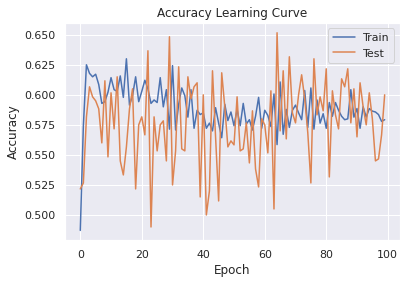

In [8]:
# Plotting the Accuracy Learning Curve
sns.set()
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']


def plot_accuracy(acc, val_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Accuracy Learning Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'])
    plt.show()
plot_accuracy(acc, val_acc)

In [9]:
# EarlyStopping stops the training (Forward/Backpropagation cycle) when the monitored quantity (Accuracy in this case)
# stops improving
model_callback = get_model(n_predictors, n_targets)
early_stopping = EarlyStopping(monitor='val_accuracy')
hist = model_callback.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

accuracy = model_callback.evaluate(X_test, y_test)[1]
print('Accuracy: ', accuracy)

Epoch 1/100
44/44 [==============================] - 3s 16ms/step - loss: 0.4722 - accuracy: 0.5300 - val_loss: 0.3657 - val_accuracy: 0.8483
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.5567
Accuracy:  0.5566666722297668


In [11]:
# How to optimize
#Store initial model weights
initial_weights = model.get_weights()

#Lists that store accuracies
train_accs = []
test_accs = []

split_sizes = [0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1]
training_samples = [int(len(X) - (len(X) * split)) for split in split_sizes]

for split_size in split_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=64, test_size=split_size)
    #set model initial weights
    model.set_weights(initial_weights)
    #fit model on new split
    model.fit(X_train, y_train, epochs=100)
    train_acc = model.evaluate(X_train, y_train)[1]
    train_accs.append(train_acc)
    test_acc = model.evaluate(X_test, y_test)[1]
    test_accs.append(test_acc)

Epoch 1/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.6250
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 0.6133
Epoch 3/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.6167
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.6167
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 0.6233
Epoch 6/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.6242
Epoch 7/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.6133
Epoch 8/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.6175
Epoch 9/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.6117
Epoch 10/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 0.6158
Epoch 11/

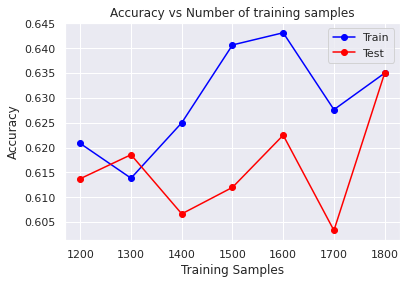

In [12]:
# Plotting the above graph
%matplotlib inline

plt.plot(training_samples, train_accs, '-o', c='blue')
plt.plot(training_samples, test_accs, '-o', c='red')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.title('Accuracy vs Number of training samples')
plt.show()

In [13]:
# Now we choose the best split-size
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [14]:
# Creating a new Function

np.random.seed(1)

# Function that returns a new model with the given activation function
def get_model(activation_function):
    model = Sequential()
    model.add(Dense(512, activation=activation_function, input_shape=(n_predictors,)))
    model.add(Dense(128, activation=activation_function, input_shape=(n_predictors,)))
    model.add(Dense(64, activation=activation_function, input_shape=(n_predictors,)))
    model.add(Dense(3, activation='sigmoid'))
    
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
   
    return model

activations = ['relu', 'sigmoid', 'tanh']
act_results = {}

for activation in activations:
    model = get_model(activation)
    hist = model.fit(X_train, y_train,
                    epochs=100, verbose=0,
                    validation_data=(X_test,y_test))
    
    # Create dictionary entrys with fit history for each
    # Activation function iteration with function name as key and history as value
    act_results[activation] = hist
        
from keras.layers import LeakyReLU
model = Sequential()
model.add(Dense(64, input_shape=(20,)))
model.add(LeakyReLU()) # outputs of first HL will be input to leakyrelu layer/activation 
model.add(Dense(3, activation='sigmoid')) # get's the output of the leakyrelu layer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, 
                        epochs=100, verbose = 0,
                    validation_data=(X_test, y_test))
act_results['leaky_relu'] = history

In [15]:
# for each key of the activation function, get the val_loss and acc history

val_loss = {k:v.history['val_loss'] for k, v in act_results.items()}
val_accuracy = {k:v.history['val_accuracy'] for k,v in act_results.items()}

df_val_acc = pd.DataFrame(val_accuracy)
df_val_loss = pd.DataFrame(val_loss)
df_val_acc.head()

,relu,sigmoid,tanh,leaky_relu
0,0.7800,0.2175,0.5375,0.5750
1,0.5300,0.5150,0.6500,0.6225
2,0.5425,0.7600,0.6900,0.6800
3,0.5450,0.7125,0.7250,0.6175
4,0.6650,0.6350,0.5625,0.6075


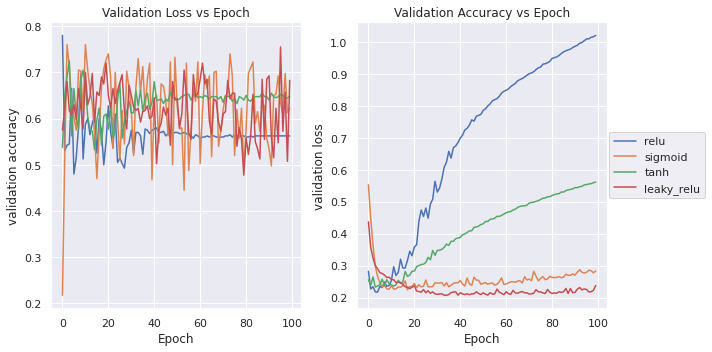

In [16]:
# Plotting graphs

# Plotting two graphs
# One which displays the Validation loss Vs Epochs of each activation fucntion
# Second which displays the Validation Accuracy Vs Epochs of each actviation function.

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
_ = df_val_acc.plot(ax=ax1, legend=None)
ax1.set_xlabel('Epoch')
ax2.set_xlabel('Epoch')
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_title('Validation Accuracy vs Epoch')
ax1.set_title('Validation Loss vs Epoch')
_2 = df_val_loss.plot(ax=ax2)
_2 = plt.legend(bbox_to_anchor=(1.2, 0.5), loc='center', ncol=1) #moves legend outside of graphic
plt.tight_layout()

In [17]:
print('Current Testset-Accuracy: ', acc)

Current Testset-Accuracy:  [0.4871428608894348, 0.5742856860160828, 0.625, 0.6178571581840515, 0.6150000095367432, 0.6171428561210632, 0.6085714101791382, 0.5928571224212646, 0.5942857265472412, 0.602142870426178, 0.6142857074737549, 0.604285717010498, 0.6028571724891663, 0.6157143115997314, 0.5978571176528931, 0.6299999952316284, 0.5914285778999329, 0.5992857217788696, 0.6150000095367432, 0.5942857265472412, 0.6028571724891663, 0.6121428608894348, 0.6050000190734863, 0.5928571224212646, 0.595714271068573, 0.5935714244842529, 0.6142857074737549, 0.5899999737739563, 0.604285717010498, 0.5714285969734192, 0.6242856979370117, 0.5707142949104309, 0.5921428799629211, 0.6057142615318298, 0.5992857217788696, 0.581428587436676, 0.604285717010498, 0.5721428394317627, 0.5871428847312927, 0.5835714340209961, 0.5849999785423279, 0.5721428394317627, 0.5764285922050476, 0.5699999928474426, 0.5892857313156128, 0.5764285922050476, 0.5642856955528259, 0.5921428799629211, 0.5785714387893677, 0.585714280

In [18]:
# Batch Normalization

batchnorm_model = Sequential()
batchnorm_model.add(Dense(128, activation='relu', input_shape=(n_predictors,)))
batchnorm_model.add(Dense(64, activation='relu', input_shape=(n_predictors,)))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(3, activation='sigmoid'))
batchnorm_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

# Making another ANN model with batch Normalization

In [19]:
# Another ANN layer with Batch Normalization

normal_model = Sequential()
normal_model.add(Dense(64, activation='relu', input_shape=(n_predictors,)))
normal_model.add(Dense(64, activation='relu', input_shape=(n_predictors,)))
normal_model.add(Dense(3, activation='sigmoid'))
normal_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

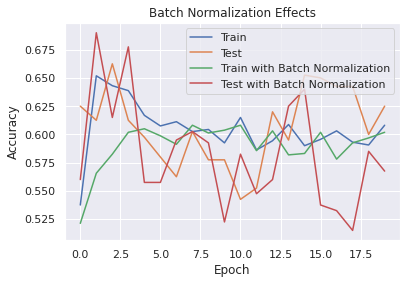

In [20]:
# Comparing the models Accuracy histories

def compare_histories_acc(h1,h2):
  plt.plot(h1.history['accuracy'])
  plt.plot(h1.history['val_accuracy'])
  plt.plot(h2.history['accuracy'])
  plt.plot(h2.history['val_accuracy'])
  plt.title("Batch Normalization Effects")
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best')
  plt.show()

history1 = normal_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=0)


history2 = batchnorm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=0)

# compare_acc_histories passing in both model histories
compare_histories_acc(history1, history2)

In [21]:
# interpretting

np.set_printoptions(suppress=True)

small_y_test = y_test[:10].values #only 1 and 0 can be converted to int
small_x_test = X_test[:10].values

#predict on x_small_test
preds = normal_model.predict(small_x_test)
#print preds vs true values

print("{:34} | {}".format('Sigmoid Output','True labels')) 
for i,pred in enumerate(preds):
    print("{} | {}".format(pred,small_y_test[i]))
    
#rounds up => 5 and down <5
preds_rounded = np.round(preds)

print('\n')
print("{:25} | {}".format('Rounded sigmoid prediction', 'True labels'))
for i,pred_rounded in enumerate(preds_rounded):
    print("                {} |  {}".format(pred_rounded, small_y_test[i]))
#    
print('\n')    
print('Accuracy on sample: ',normal_model.evaluate(small_x_test, small_y_test)[1])    

1/1 [==============================] - 0s 160ms/step
Sigmoid Output                     | True labels
[0.85924566 0.7402996  0.5341    ] | [1 1 1]
[0.03390013 0.03306758 0.12297736] | [0 0 0]
[0.98840123 0.9993375  0.01081885] | [1 1 0]
[0.99729335 0.9920306  0.00158307] | [1 1 0]
[0.9992571  0.00528933 0.00012702] | [1 0 0]
[0.9531734  0.733508   0.13120273] | [0 0 0]
[0.99713755 0.8432076  0.00403657] | [1 1 0]
[0.9097836  0.9994156  0.00884425] | [1 1 0]
[0.9509116  0.99986196 0.00014231] | [1 1 0]
[0.999536   0.99968815 0.9992379 ] | [1 1 1]


Rounded sigmoid prediction | True labels
                [1. 1. 1.] |  [1 1 1]
                [0. 0. 0.] |  [0 0 0]
                [1. 1. 0.] |  [1 1 0]
                [1. 1. 0.] |  [1 1 0]
                [1. 0. 0.] |  [1 0 0]
                [1. 1. 0.] |  [0 0 0]
                [1. 1. 0.] |  [1 1 0]
                [1. 1. 0.] |  [1 1 0]
                [1. 1. 0.] |  [1 1 0]
                [1. 1. 1.] |  [1 1 1]


1/1 [==================

# Real Time data



*   Real tine data is provided by the sensors.
*   That data is converted into a csv file one of googles' API's, and this is the code for the following.

```
# import requests
url = "https://sheets.googleaps.com/v4/spreadsheets/{spreadsheetId}/values/{sheetname}!range{range}?alt=csv"
response = requests.get(url)
with open("sheet.csv", "wb) as f:
  f.write(response.content)
```

*   This is a code that will be used to convert the data into a csv filw which will be fed further into our ANN model.



